<a href="https://colab.research.google.com/github/TNH510/Artificial-Intelligence/blob/main/Fingerprint_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from os import listdir
from numpy import asarray, save
from keras.utils import load_img
from keras.utils import img_to_array
import numpy as np
from sklearn.model_selection import train_test_split
from keras.datasets import cifar100
import matplotlib.pyplot as plt
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, Normalization
from keras.models import Sequential, Model
from keras import Input
from keras.layers import LeakyReLU
from keras.optimizers import Adam

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from numpy import asarray
import cv2

folder = '/content/drive/MyDrive/Fingerprint Recognition/Data/'
photos, labels = list(), list()
for file in listdir(folder):
  output = 0.0
  if file.startswith('AS'):
    output = 0
  if file.startswith('L'):
    output = 1
  if file.startswith('WD'):
    output = 2
  if file.startswith('WS'):
    output = 3

  photo_RGB = load_img(folder + file, target_size=(160, 160))
  #Convert to gray Image
  photo = photo_RGB.convert('L')

  photo = img_to_array(photo)
  photos.append(photo)
  labels.append(output)

photos = asarray(photos)
labels = asarray(labels)
print(photos.shape, labels.shape)
save('/content/drive/MyDrive/Fingerprint Recognition/Fingerprint_photos.npy', photos)
save('/content/drive/MyDrive/Fingerprint Recognition/Fingerprint_labels.npy', labels)

# Load images and labels
from keras.utils import to_categorical #one hot encoding
labels_one_hot = to_categorical(labels)
x_train, x_test, y_train, y_test = train_test_split(photos, labels_one_hot, test_size = 0.3, random_state = 100)

(800, 160, 160, 1) (800,)


In [ ]:
model = Sequential()
#Convolutional
model.add(Conv2D(64, kernel_size= (3,3), activation= 'linear', input_shape= (160,160,1), padding= 'same'))
model.add(LeakyReLU(alpha= 0.1))
model.add(MaxPooling2D((2,2), padding= 'same'))
model.add(Conv2D(128, (3,3), activation= 'linear', padding= 'same'))
model.add(LeakyReLU(alpha= 0.1))
model.add(MaxPooling2D((2,2), padding= 'same'))
model.add(Conv2D(256, (3,3), activation= 'linear', padding= 'same'))
model.add(LeakyReLU(alpha= 1))
model.add(MaxPooling2D((2,2), padding= 'same'))

#ANN
model.add(Flatten())
model.add(Dense(256, activation= 'linear'))
model.add(LeakyReLU(alpha= 0.1))
model.add(Dense(4, activation= 'softmax'))

model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_21 (Conv2D)          (None, 160, 160, 64)      640       
                                                                 
 leaky_re_lu_28 (LeakyReLU)  (None, 160, 160, 64)      0         
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 80, 80, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_22 (Conv2D)          (None, 80, 80, 128)       73856     
                                                                 
 leaky_re_lu_29 (LeakyReLU)  (None, 80, 80, 128)       0         
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 40, 40, 128)      0         
 g2D)                                                

In [ ]:
#Tăng cường data
from keras.preprocessing.image import ImageDataGenerator
aug = ImageDataGenerator(rotation_range=20, zoom_range=0.1,
    rescale=1./255,
	width_shift_range=0.1,
    height_shift_range=0.1,
	horizontal_flip=True,
    brightness_range=[0.2,1.5], fill_mode="nearest")

In [ ]:
from keras.backend import categorical_crossentropy
model.compile(loss='categorical_crossentropy', optimizer = Adam(), metrics=['accuracy'])
train = model.fit(aug.flow(x_train, y_train, batch_size=32),
                               epochs = 50)
test_loss, test_acc = model.evaluate(x_test,y_test)
print("Accurency:", test_acc)
print('Loss:', test_loss)

Epoch 1/50
18/18 [==============================] - 6s 272ms/step - loss: 3.0448 - accuracy: 0.5536
Epoch 2/50
18/18 [==============================] - 3s 135ms/step - loss: 1.0734 - accuracy: 0.6357
Epoch 3/50
18/18 [==============================] - 2s 89ms/step - loss: 1.0657 - accuracy: 0.6268
Epoch 4/50
18/18 [==============================] - 2s 88ms/step - loss: 1.0593 - accuracy: 0.6375
Epoch 5/50
18/18 [==============================] - 2s 89ms/step - loss: 1.0611 - accuracy: 0.6304
Epoch 6/50
18/18 [==============================] - 2s 91ms/step - loss: 1.0387 - accuracy: 0.6357
Epoch 7/50
18/18 [==============================] - 2s 128ms/step - loss: 1.0113 - accuracy: 0.6268
Epoch 8/50
18/18 [==============================] - 2s 120ms/step - loss: 0.9994 - accuracy: 0.6357
Epoch 9/50
18/18 [==============================] - 2s 91ms/step - loss: 0.9837 - accuracy: 0.6339
Epoch 10/50
18/18 [==============================] - 2s 92ms/step - loss: 0.9323 - accuracy: 0.6500
Epoch

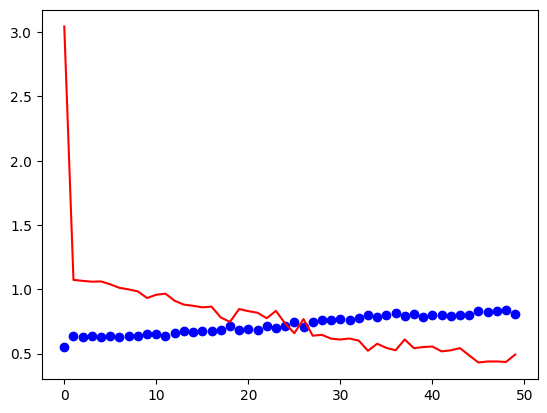

In [ ]:
from matplotlib import pyplot as plt
accuracy= train.history['accuracy']
loss= train.history['loss']
epochs= range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label= 'Training accuracy')
plt.plot(epochs, loss, 'r', label= 'Training loss')
plt.show()

In [ ]:
from keras.backend import categorical_crossentropy
model.compile(loss='categorical_crossentropy', optimizer = Adam(), metrics=['accuracy'])
train = model.fit(aug.flow(x_train, y_train, batch_size=32),
                               epochs = 50)
test_loss, test_acc = model.evaluate(x_test,y_test)
print("Accurency:", test_acc)
print('Loss:', test_loss)

Epoch 1/50
18/18 [==============================] - 2s 94ms/step - loss: 0.5530 - accuracy: 0.7982
Epoch 2/50
18/18 [==============================] - 2s 89ms/step - loss: 0.5232 - accuracy: 0.7946
Epoch 3/50
18/18 [==============================] - 2s 89ms/step - loss: 0.5367 - accuracy: 0.7982
Epoch 4/50
18/18 [==============================] - 2s 90ms/step - loss: 0.4651 - accuracy: 0.8214
Epoch 5/50
18/18 [==============================] - 2s 129ms/step - loss: 0.4445 - accuracy: 0.8464
Epoch 6/50
18/18 [==============================] - 2s 116ms/step - loss: 0.4843 - accuracy: 0.8161
Epoch 7/50
18/18 [==============================] - 2s 88ms/step - loss: 0.4559 - accuracy: 0.8107
Epoch 8/50
18/18 [==============================] - 2s 88ms/step - loss: 0.4055 - accuracy: 0.8446
Epoch 9/50
18/18 [==============================] - 2s 87ms/step - loss: 0.4750 - accuracy: 0.8357
Epoch 10/50
18/18 [==============================] - 2s 89ms/step - loss: 0.4915 - accuracy: 0.7964
Epoch 1

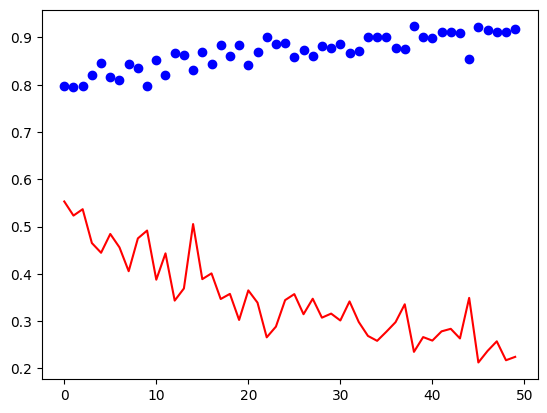

In [ ]:
from matplotlib import pyplot as plt
accuracy= train.history['accuracy']
loss= train.history['loss']
epochs= range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label= 'Training accuracy')
plt.plot(epochs, loss, 'r', label= 'Training loss')
plt.show()

In [ ]:
model.save('/content/drive/MyDrive/Fingerprint Recognition/Fingerprint.h5')

In [ ]:
from keras.models import load_model
model = load_model('/content/drive/MyDrive/Fingerprint Recognition/Fingerprint.h5')

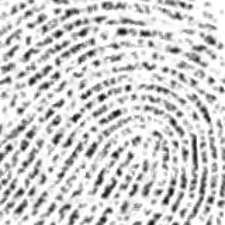

1/1 [==============================] - 0s 25ms/step
['Chủng vân tay của bạn là Loop, bạn là người sống rất tình cảm, thích sống tự do, thoải mái và sống cho hiện tại']


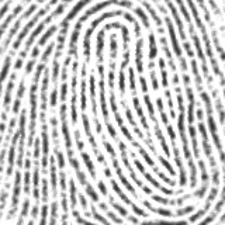

1/1 [==============================] - 0s 20ms/step
['Chủng vân tay của bạn là Composite Whorl, bạn là người có thể tương tác với nhiều đối tượng, thích đổi mới và linh hoạt ']


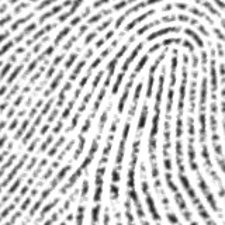

1/1 [==============================] - 0s 18ms/step
['Chủng vân tay của bạn là Loop, bạn là người sống rất tình cảm, thích sống tự do, thoải mái và sống cho hiện tại']


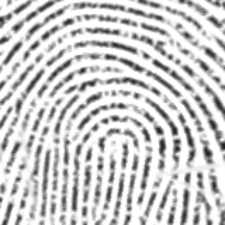

1/1 [==============================] - 0s 20ms/step
['Chủng vân tay của bạn là Loop, bạn là người sống rất tình cảm, thích sống tự do, thoải mái và sống cho hiện tại']


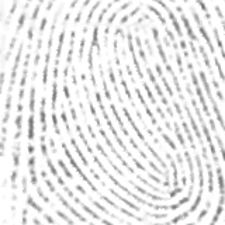

1/1 [==============================] - 0s 19ms/step
['Chủng vân tay của bạn là Composite Whorl, bạn là người có thể tương tác với nhiều đối tượng, thích đổi mới và linh hoạt ']


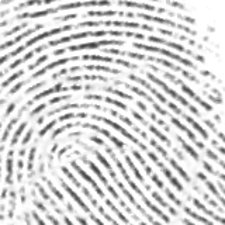

1/1 [==============================] - 0s 18ms/step
['Chủng vân tay của bạn là Loop, bạn là người sống rất tình cảm, thích sống tự do, thoải mái và sống cho hiện tại']


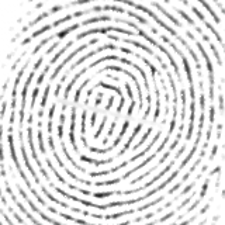

1/1 [==============================] - 0s 21ms/step
['Chủng vân tay của bạn là Spiral Whorl, bạn là người thẳng thắn mạnh mẽ, có cái tôi mạnh mẽ và có xu hướng lãnh đạo']


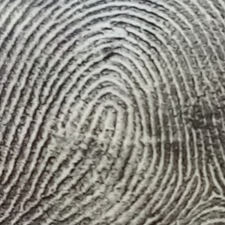

1/1 [==============================] - 0s 19ms/step
['Chủng vân tay của bạn là Loop, bạn là người sống rất tình cảm, thích sống tự do, thoải mái và sống cho hiện tại']


In [ ]:
from PIL import Image
import numpy as np
import os
from keras.utils import img_to_array

#Tạo mảng để chứa label
label = np.array(['Chủng vân tay của bạn là Simple Arch, bạn là người rất có tiềm năng,có thói quen phòng thủ và che dấu cảm xúc',
                  'Chủng vân tay của bạn là Loop, bạn là người sống rất tình cảm, thích sống tự do, thoải mái và sống cho hiện tại', 
                  'Chủng vân tay của bạn là Composite Whorl, bạn là người có thể tương tác với nhiều đối tượng, thích đổi mới và linh hoạt ', 
                  'Chủng vân tay của bạn là Spiral Whorl, bạn là người thẳng thắn mạnh mẽ, có cái tôi mạnh mẽ và có xu hướng lãnh đạo'])

# Kích thước mới của ảnh
new_size = (225, 225)
predict_size = (160, 160)

# Đường dẫn đến thư mục chứa ảnh trong Drive
path = '/content/drive/MyDrive/Fingerprint Recognition/Checking data/'
images = os.listdir(path)

# Đọc ảnh từ thư mục trên Drive và hiển thị chúng trên Colab
for image_name in images:
    # Đường dẫn đến file ảnh
    img_path = os.path.join(path, image_name)
    # Đọc ảnh
    if os.path.isfile(img_path):
      # Đọc ảnh
      img = Image.open(img_path)
      img_origin = Image.open(img_path)

      # Resize ảnh về kích thước mới
      img_origin = img.resize(new_size)
      img_origin.show()

      #Dự đoán
      img = img.resize(predict_size)
      img = img.convert('L')
      img = img_to_array(img)
      img = img.reshape(1,160,160,1)
      img = img.astype('float32')/255
      max = np.argmax(model.predict(img), axis = 1)
      print(label[max])